<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminaries</a></span><ul class="toc-item"><li><span><a href="#Reminder" data-toc-modified-id="Reminder-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Reminder</a></span></li><li><span><a href="#Notes" data-toc-modified-id="Notes-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Notes</a></span></li><li><span><a href="#Modules-for-this-notebook" data-toc-modified-id="Modules-for-this-notebook-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Modules for this notebook</a></span></li></ul></li><li><span><a href="#Important-Graphs-(continued)" data-toc-modified-id="Important-Graphs-(continued)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Important Graphs (continued)</a></span><ul class="toc-item"><li><span><a href="#Cycle-Graphs" data-toc-modified-id="Cycle-Graphs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cycle Graphs</a></span></li></ul></li><li><span><a href="#New-Graphs-from-old" data-toc-modified-id="New-Graphs-from-old-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>New Graphs from old</a></span><ul class="toc-item"><li><span><a href="#Complement-Graph" data-toc-modified-id="Complement-Graph-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Complement Graph</a></span></li><li><span><a href="#Line-Graphs" data-toc-modified-id="Line-Graphs-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Line Graphs</a></span><ul class="toc-item"><li><span><a href="#Examples" data-toc-modified-id="Examples-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Examples</a></span></li><li><span><a href="#Line-graph-of-$C_4$" data-toc-modified-id="Line-graph-of-$C_4$-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Line graph of $C_4$</a></span></li></ul></li><li><span><a href="#Petersen-Graph" data-toc-modified-id="Petersen-Graph-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Petersen Graph</a></span></li></ul></li><li><span><a href="#Matrices-of-Graphs" data-toc-modified-id="Matrices-of-Graphs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Matrices of Graphs</a></span></li><li><span><a href="#Adjacency-Matrix" data-toc-modified-id="Adjacency-Matrix-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Adjacency Matrix</a></span><ul class="toc-item"><li><span><a href="#Example" data-toc-modified-id="Example-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Example</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Example</a></span></li><li><span><a href="#Properties-of-Adjacency-matrices" data-toc-modified-id="Properties-of-Adjacency-matrices-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Properties of Adjacency matrices</a></span></li><li><span><a href="#Sparse-matrices" data-toc-modified-id="Sparse-matrices-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Sparse matrices</a></span></li><li><span><a href="#Another-example" data-toc-modified-id="Another-example-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Another example</a></span><ul class="toc-item"><li><span><a href="#More-about-Adjacency-Matrices" data-toc-modified-id="More-about-Adjacency-Matrices-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>More about Adjacency Matrices</a></span></li></ul></li></ul></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercises</a></span></li></ul></div>

 # CS4423-Networks : Week 02 - Lecture 2 [$\color{red}{\text{DRAFT}}$]
# From  Graphs to Matrices
Niall Madden, 
School of Mathematical and Statistical Sciences  
University of Galway

(These notes are adapted from Angela Carnevale's nodes)

This Jupyter notebook, and a HTML version, can be found at https://www.niallmadden.ie/2425-CS4423/#Week02

<div class="rc"><font size="-1"><em>This version of this notebook was written by Niall Madden, adapted from notebooks by Angela Carnevale.</em></div>

## Preliminaries
### Reminder

Labs start next week, and an (reintroduction) to Python. This will run:
* Tuesday at 4 in AC215 (slight chance this might get moved to Tuesday at 3), and
* Wednesday at 10am in CA116a. 

These rooms are not labs: BYoD! (Bring Your Own Device)


### Notes 
(Revised) Notes from yesterday's class are at https://www.niallmadden.ie/2425-CS4423/#Week02. As well as the material we covered, there is a set of exercises at the end of the notebook, including some based on past exam papers.

### Modules for this notebook

In [1]:
import networkx as nx
import numpy as np
opts = { "with_labels": True, "node_color": 'pink' } # show labels; pink noodes
from itertools import combinations

## Important Graphs (continued)

Yesteryday, we discussed 
* Complete Graphs, which can be built using, for example `nx.complete_graph("NETWORKS")`
* Bipartite and complete bipartite graphs, the latter of which can be built using `nx.complete_bipartite_graph(m,n)`. One can also use *list comprehension* to make the edge set: `E = [(x, y) for x in X1 for y in X2 if x < y]`
* Path graphs, built with `nx.path_graph(10)`. Can also use list comprehension to make the edge set (next week's lab)

### Cycle Graphs

Our last example: the **cycle** graph on $n \geq 3$ nodes, denoted $C_n$, (slightly informally) is formed by adding an edge between to to nodes of degree 1 in a path graph if we delete any one edge is a es is connected, which as a path graph, but with an edge between the two "end" nodes. You can make one with `cycle_graph(n)`, but here we'll do it manually.
    

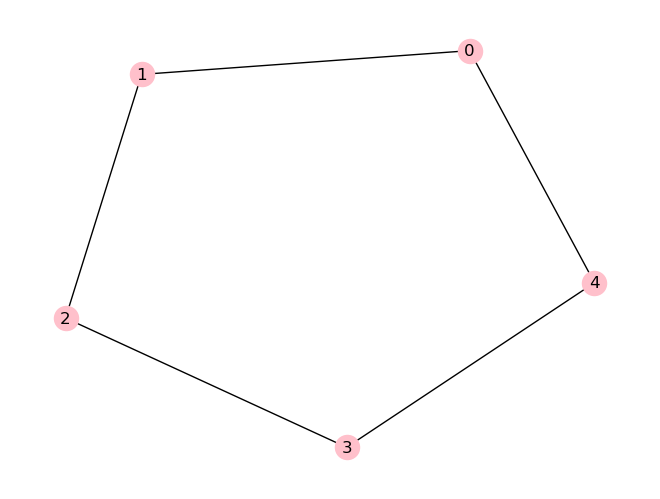

In [2]:
C5 = nx.Graph(['01', '12', '23', '34', '40'])
nx.draw(C5, **opts)             

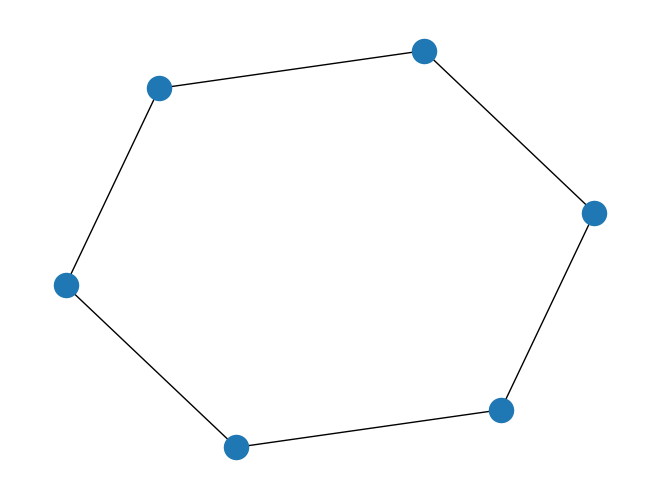

In [3]:
nx.draw(nx.cycle_graph(6))

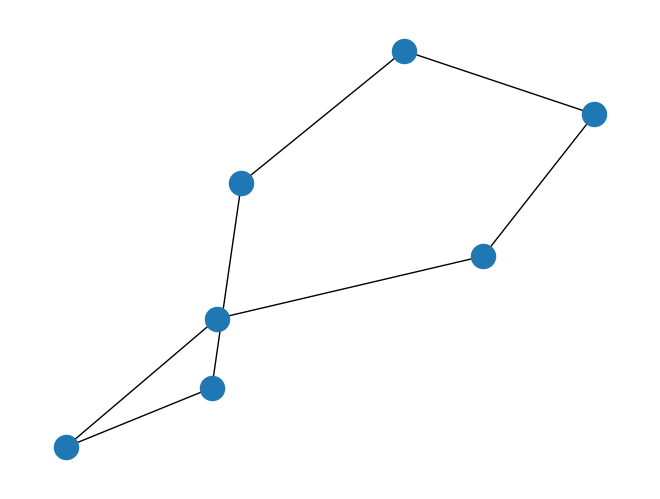

In [4]:
C7 = nx.path_graph(7) # not a cycle graph... yet
C7.add_edge(0,6)
nx.draw(C7)

## New Graphs from old

### Complement Graph

The **complement of a graph** $G$ is a graph $H$ with the same nodes as $G$, and two nodes in $H$ are adjacent if and only if they are *not* adjacent in G. 

For example, the complement of a complete graph is an empty graph.

In `networkx`, the `complement` function returns to complement of a graph.

In [5]:
G = nx.Graph([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5)])
G_complement = nx.complement(G)
list( G_complement.edges() )  # This shows the edges of the complemented graph

[(1, 4), (1, 5), (2, 4), (2, 5), (4, 5)]

**Tip**: `nx.draw` uses a (semi-random) algorithm, called `spring_layout` for deciding the position of nodes when we draw a graph.  Usually, a graph and its complement will be drawn with nodes in different places, making them hard to compare. But we can record the positions determined by the algorithm, and reuse them, as in the next example...

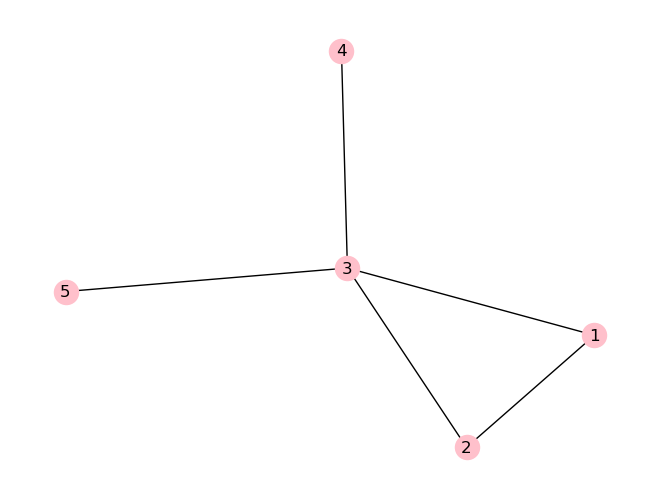

In [6]:
pos = nx.spring_layout( G)
nx.draw(G, **opts, pos=pos)

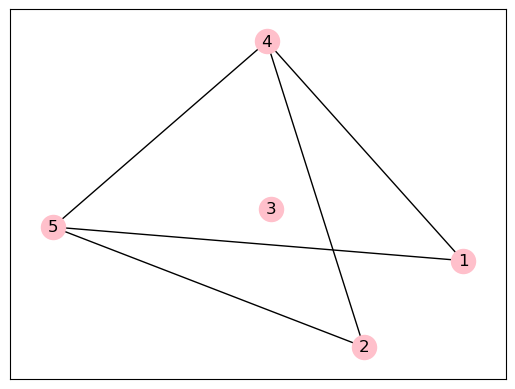

In [7]:
nx.draw_networkx(G_complement, **opts, pos=pos)

### Line Graphs

A graph, $G$, is made from "things" that have connections to each other. The "things" are nodes, and their connections are represented by an edge.

But we can think of edges as "things" too, with connections to any other edge that has a vertex in common. This leads to the idea of a _line graph_.

The **line graph** of $G$, is denoted $L(G)$: every node in $L(G)$ corresponds to an edge in $G$,  and for every two edges in $G$ that have a node in common, $L(G)$ has an edge between their corresponding nodes.

#### Examples

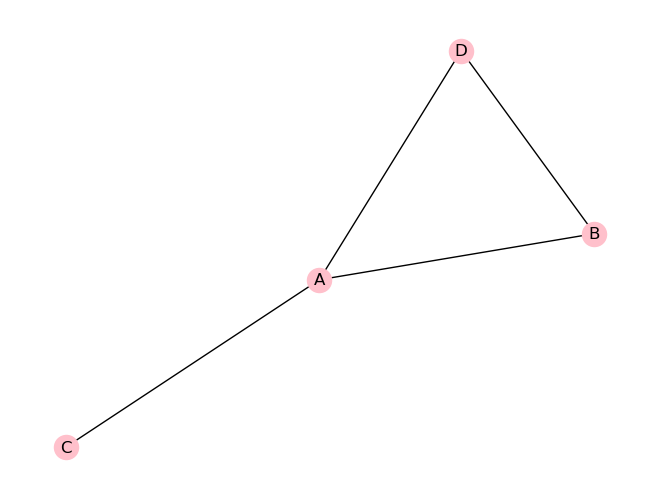

In [8]:
G = nx.Graph(["AB", "AC", "AD", "BD"])
nx.draw(G, **opts)

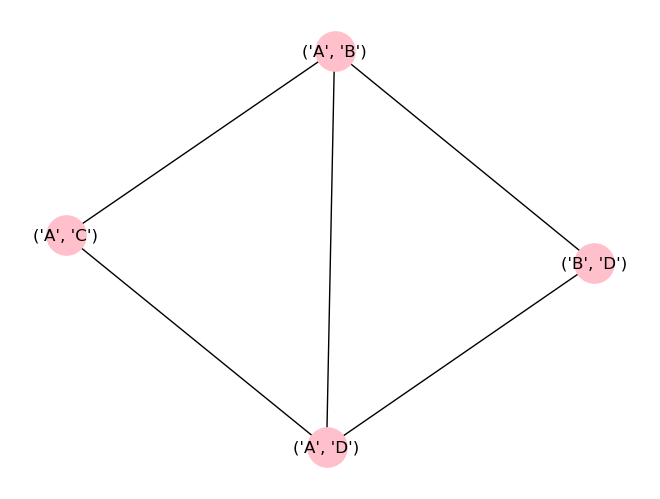

In [9]:
LG = nx.line_graph(G)
nx.draw(LG, **opts, node_size=800) # large nodes to label easier to read

#### Line graph of $C_4$

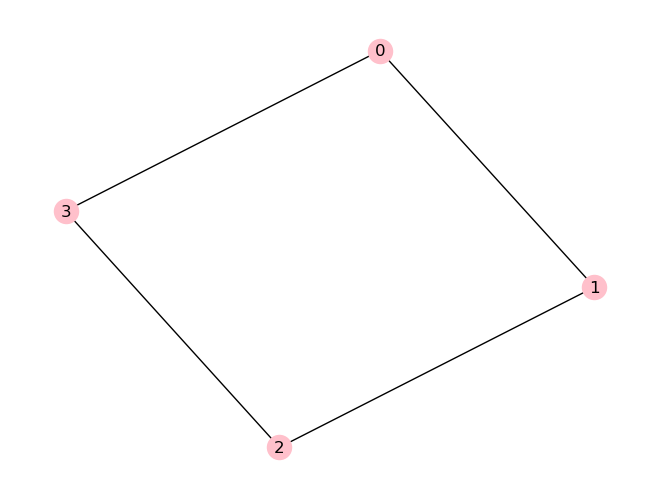

In [10]:
G = nx.cycle_graph(4)
nx.draw(G, **opts)

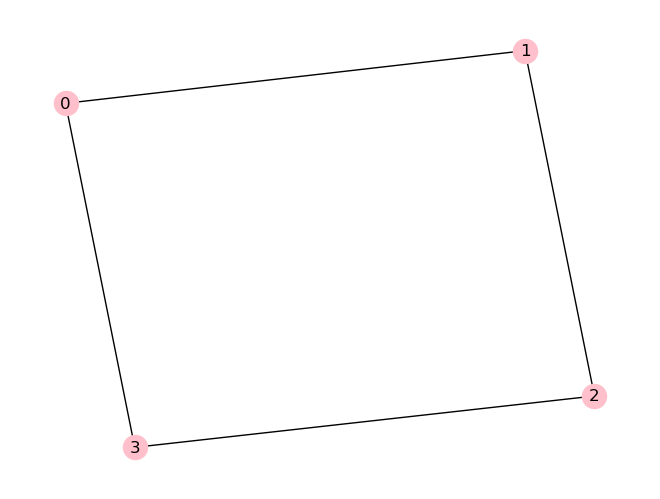

In [11]:
LG = nx.line_graph(G)
nx.draw(G, **opts)

### Petersen Graph

Everyone who has a favourite graph has as their favourite graph the [Petersen Graph](https://en.wikipedia.org/wiki/Petersen_graph). It is  a graph on $10$ nodes with $15$ edges.

One way to construct it, is as the **complement** of the **line graph** of the complete graph $K_5$.

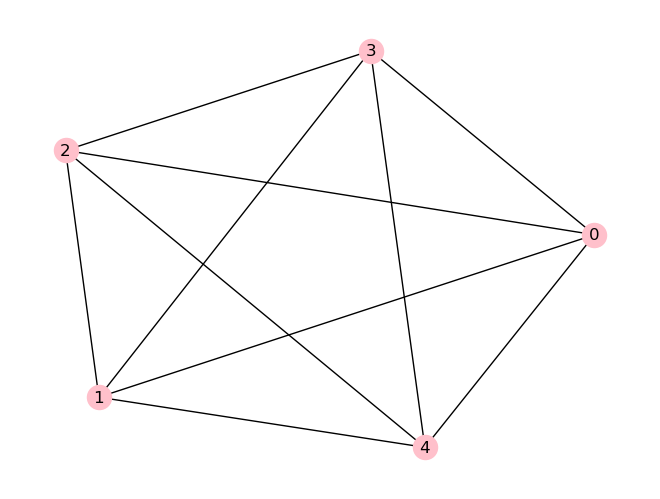

In [12]:
K5 = nx.complete_graph(5)
nx.draw(K5, **opts)

Next we make the line graph, $L(K_5)$:

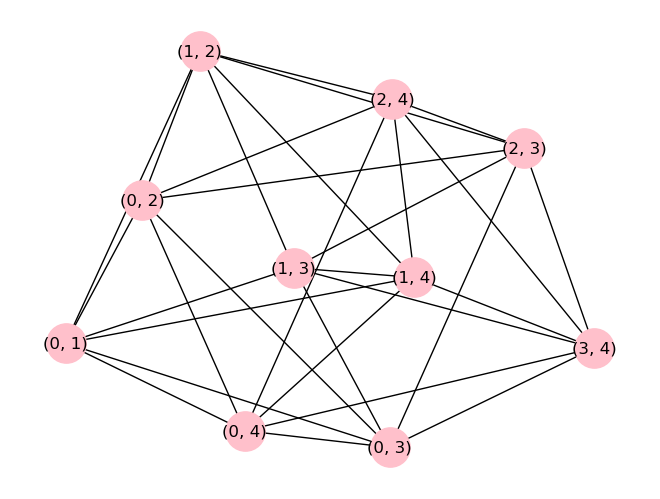

In [13]:
LK5 = nx.line_graph(K5)
nx.draw(LK5, **opts, node_size=800)

And (almost) finally, we take the complement of $L(K_5)$.

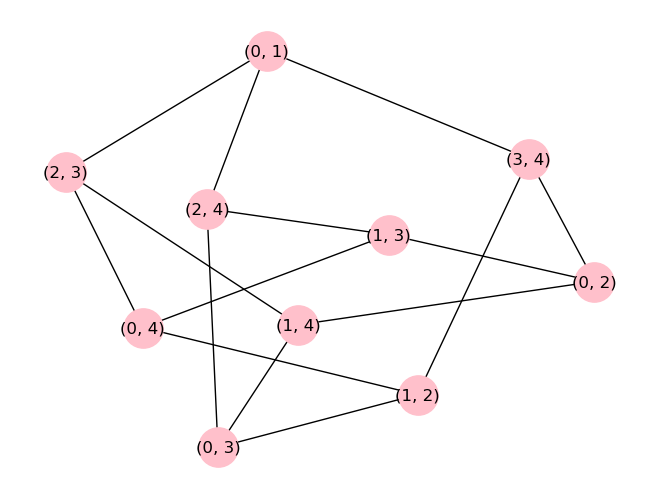

In [14]:
Petersen = nx.complement(LK5)
nx.draw(Petersen, **opts, node_size=800)

While the graph is correct, we have to be quite careful with the positioning of the nodes to get a proper view of the graph:

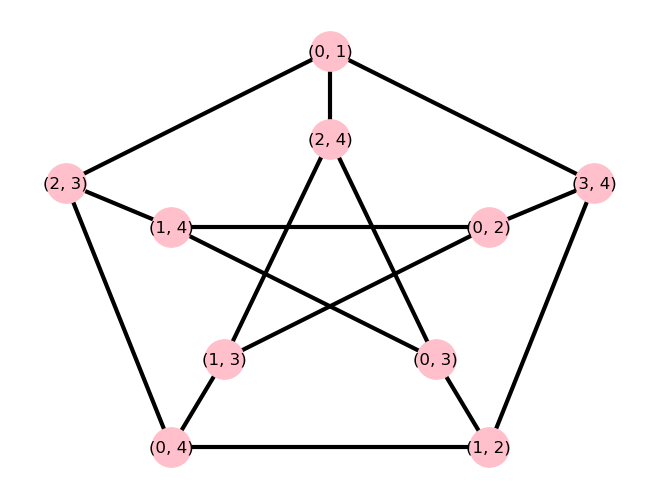

In [15]:
pos = nx.circular_layout(Petersen)
pos[(0,1)]=[0,x

## Matrices of Graphs

There are various ways the represent a network/graph, including:
* The node set and edge set, or
* a drawing of the graph.
But, computationally, the most useful way is as a matrix. Three important matrix representations are
1. **The Adjacency Matrix** (most important)
2. **Incidence Matrix** (has its uses)
3. **The Graph Laplacian** (the coolest)



## Adjacency Matrix

**Definition** The  __adjacency matrix__ of a graph, $G$ of order $n$, is a square $n\times n$ matrix, $A=(a_{ij})$, 
with rows and columns corresponding to the nodes of the graph. That is, we number the nodes $1, 2, \dots, n$. Then $A$ is given by 
$$
    a_{ij}=\begin{cases} 1 & \mbox{if node $i$ and $j$ are joined by an edge},\\
0 &\mbox{otherwise}.\end{cases}
$$


### Example
Let $G=G(X,E)$ be the graph with $X=\{a,b,c,d,e\}$ and edges $a-b$, $b-c$, $b-d$, $c-d$ and $d-e$.
Then $$A = 
\begin{pmatrix}
0&1&0&0&0\\
1&0&1&1&0\\
0&1&0&1&0\\
0&1&1&0&1\\
0&0&0&1&0
\end{pmatrix}$$

### Example
The adjacency matrix of $K_4$ is 
$$ A = \begin{pmatrix} 
0 & 1 & 1 &1 \\
1 & 0 & 1 &1 \\
1 & 1 & 0 &1 \\
1 & 1 & 1 &0 
\end{pmatrix}$$

### Properties of Adjacency matrices 
1. $\sum_{i=1}^N \sum_{j=1}^N a_{ij} = \sum_{u \in X} \mathrm{deg}(u)$, where $\mathrm{deg}(u)$ is the degree of $u$.
2. All graphs we've seen so far are _undirected_. For all such graphs, $A$ is symmetric: $A=A^T$; equivalently $a_{ij}=a_{ji}$
4. $a_{ii}=0$ for all $i$.
3. In real-world examples, $A$ would usually be **sparse**, which means that $\sum_{i=1}^N \sum_{j=1}^N a_{ij}  \ll n^2$. (I.e., the vast majority of the entries are zero).

### Sparse matrices
Sparse matrices have huge importance in computational linear algebra. The main idea is that it is much more efficient to just store the location of the non-zero entries. That is what `networkx` does:

In [16]:
C4 = nx.cycle_graph(4)
A_C4 = nx.adjacency_matrix(C4)
print(A_C4)

<Compressed Sparse Row sparse array of dtype 'int64'
	with 8 stored elements and shape (4, 4)>
  Coords	Values
  (0, 1)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 3)	1
  (3, 0)	1
  (3, 2)	1


This matrix is internally represented as a `scipy` sparse matrix. It needs to be converted (e.g. by the `toarray` method) in order to be displayed as a matrix as usual.


In [17]:
type(A_C4)

scipy.sparse._csr.csr_array

In [18]:
type(A_C4.toarray())

numpy.ndarray

In [19]:
print(A_C4.toarray())

[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]


### Another example
Here is another example, we introduce to look at the idea of creating a graph from a matrix:

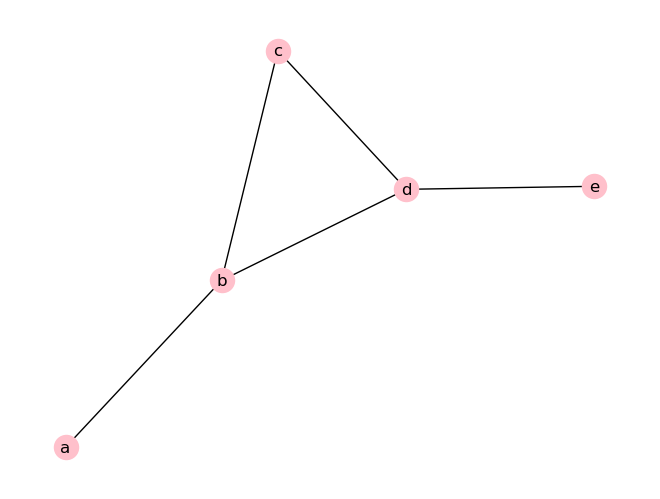

In [20]:
G = nx.Graph(["ab", "bc", "bd", "cd", "de"])
nx.draw(G, **opts)

In [21]:
A = nx.adjacency_matrix(G)
print(A.toarray())

[[0 1 0 0 0]
 [1 0 1 1 0]
 [0 1 0 1 0]
 [0 1 1 0 1]
 [0 0 0 1 0]]


Now let's make a graph from that matrix:

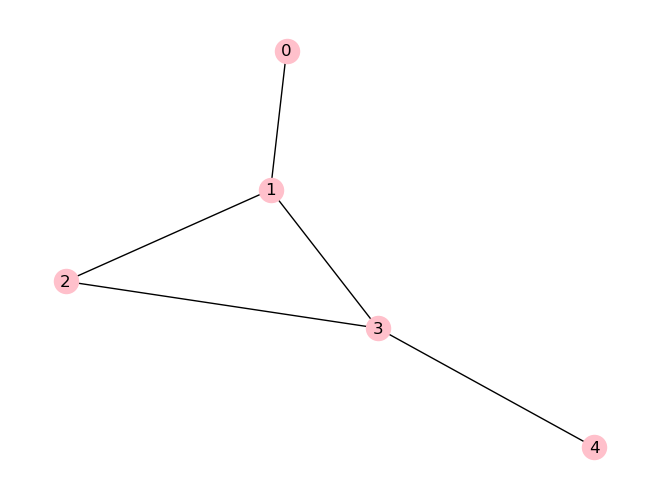

In [22]:
H = nx.from_numpy_array(A.toarray())
nx.draw(H, **opts)

So the graph is more or less the same, but the labels have changed!

#### More about Adjacency Matrices

Next week we'll learn more about these matrices. In particular, even though they are created just as a table of numbers representing a graph, matrix algebra is really important! Examples:
* Matrix-vector products can tell us about neighbours of a vertex
* Matrix-matrix produces can let us compose the actions to two networks
* Matrix powers tell us about paths of given lengths
* Even the eigenvalues of $A$ give us information about the network

## Exercises

1. For what values of $n$ is $C_n$ bipartite?
2. In this class we looked at a few graph generators in `networkx`. Explore the following: `barbell_graph`, `ladder_graph`, `lollipop_graph`, `star_graph` and `wheel_graph`.
3. We say two graphs are **equal** if they have the same node and edge sets. We say they are **isomorphic** if there is a relabling of their nodes that makes them equal. Verify that $C_5$ is isomorphic to its complement.
4. Convince yourself that $C_n$ is always isomorphic to $L(C_n)$, the line graph of $C_n$.
5. Is the Petersen graph bipartite?
6. Write down the adjacency matrix of $K_{3,3}$

<div class="alert alert-block alert-info">Finished here Thursday</div>